In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2022-02-12 16:11:50.884297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-12 16:11:50.884342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [4]:
dataset = pd.read_csv('./College/Admission_Predict.csv')

In [5]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
dataset = dataset.drop('Serial No.',axis=1)

In [8]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [12]:
train_dataset = dataset.sample(frac=0.8,random_state=0)

In [13]:
train_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68


In [14]:
test_dataset = dataset.drop(train_dataset.index)

In [15]:
test_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
9,323,108,3,3.5,3.0,8.6,0,0.45
25,340,120,5,4.5,4.5,9.6,1,0.94
28,295,93,1,2.0,2.0,7.2,0,0.46
31,327,103,3,4.0,4.0,8.3,1,0.74
32,338,118,4,3.0,4.5,9.4,1,0.91


In [17]:
train_labels = train_dataset.pop('Chance of Admit ')

In [18]:
test_labels = test_dataset.pop('Chance of Admit ')

In [19]:
train_labels.head()

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
Name: Chance of Admit , dtype: float64

In [149]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

type(train_stats)
train_stats.to_csv('stats.csv')

In [29]:

def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

In [31]:
norm_train_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,0.158788,-0.179790,-0.945427,0.664845,0.598456,-1.087169,0.880814
254,0.426033,1.148913,0.830022,0.664845,1.706707,0.941999,-1.132475
283,0.426033,0.650649,-0.057702,-0.860612,-0.509796,0.569985,0.880814
445,1.049605,1.481089,1.717747,1.173330,1.706707,0.874360,0.880814
461,-1.355601,-0.844142,-0.057702,-0.860612,-1.618047,-0.732064,0.880814


# Now we will be building the sequential model

In [33]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]),
        layers.Dense(64,activation=tf.nn.relu),
        layers.Dense(1)
    ]
    )
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics = ['mae','mse'])
    return model

In [34]:
model = build_model()

2022-02-12 16:56:45.190623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-12 16:56:45.190646: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 16:56:45.190661: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ansh-IdeaPad-Flex-5-14ITL05): /proc/driver/nvidia/version does not exist
2022-02-12 16:56:45.190815: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


## Now let us try some examples from the train data only

In [36]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.091],
       [ 0.245],
       [ 0.285],
       [ 0.698],
       [ 0.441],
       [-0.163],
       [-0.159],
       [ 0.078],
       [-0.057],
       [-0.076]], dtype=float32)

In [38]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs):
        if epochs%100==0 : print('')
        print('.',end='')
EPOCHS = 1000

history = model.fit(norm_train_data,
                   train_labels,
                   epochs=EPOCHS,
                   validation_split=0.2,
                   verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail

<bound method NDFrame.tail of          loss       mae       mse  val_loss   val_mae   val_mse  epoch
0    0.043000  0.175671  0.043000  0.036127  0.149968  0.036127      0
1    0.022483  0.124880  0.022483  0.024328  0.115390  0.024328      1
2    0.014222  0.097524  0.014222  0.018197  0.099164  0.018197      2
3    0.010800  0.082471  0.010800  0.016462  0.097389  0.016462      3
4    0.011449  0.086380  0.011449  0.014299  0.094001  0.014299      4
..        ...       ...       ...       ...       ...       ...    ...
995  0.000297  0.014492  0.000297  0.007340  0.062666  0.007340    995
996  0.000146  0.009571  0.000146  0.007958  0.066013  0.007958    996
997  0.000308  0.014678  0.000308  0.007515  0.064967  0.007515    997
998  0.000354  0.015787  0.000354  0.007788  0.065699  0.007788    998
999  0.000143  0.009660  0.000143  0.006794  0.060827  0.006794    999

[1000 rows x 7 columns]>

### Now we will plot and look why validation loss is increasing

In [46]:
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean absolute error (Chance of Admit)')
    plt.plot(hist['epoch'],hist['mae'],label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],label='Val Error')
    plt.legend()
    plt.ylim([0,0.5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared error (Chance of Admit)')
    plt.plot(hist['epoch'],hist['mse'],label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],label='Val Error')
    plt.legend()
    plt.ylim([0,0.05])
    
    

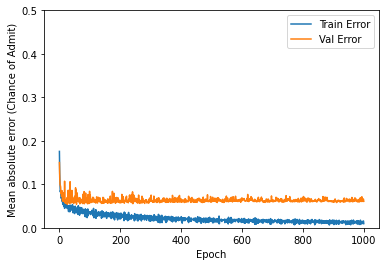

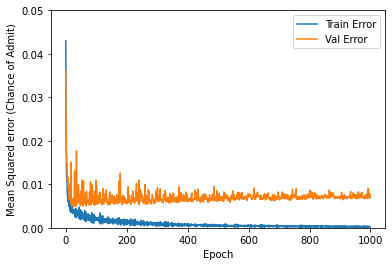

In [47]:
plot_history(history)

### In order to avoid overfitting we will stop early


.................................................

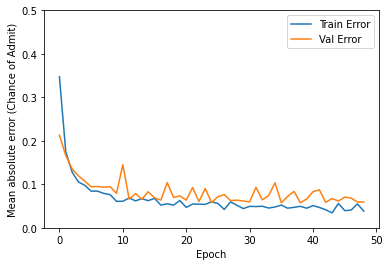

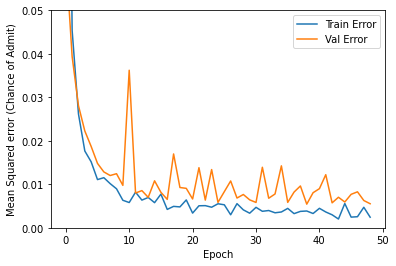

In [49]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(norm_train_data,
                   train_labels,
                   epochs=EPOCHS,
                   validation_split=0.2,
                   verbose=0,
                   callbacks=[early_stop,PrintDot()])
plot_history(history)

## Test Data loss
Now let us look at various losses on our test data

In [50]:
loss,mae,mse = model.evaluate(norm_test_data,test_labels,verbose=0)
print("Mean absolute error is {:5.2f} percent".format(mae))

Mean absolute error is  0.06 percent


### Now we will be making some predictions

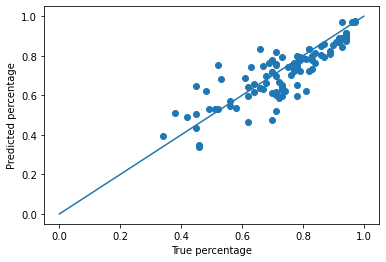

In [51]:
test_predictions = model.predict(norm_test_data).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True percentage')
plt.ylabel('Predicted percentage')
_=plt.plot([0,1],[0,1])

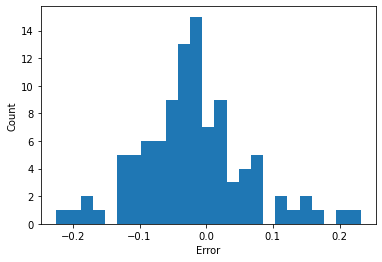

In [52]:
error = test_predictions-test_labels
plt.hist(error,bins=25)
plt.xlabel('Error')
_=plt.ylabel('Count')

Now let us predict for a random person with given scores

In [161]:
op = norm([321,114,3,4.5,4.5,9.08,1])
a=[]
for index,value in op.items():
    a.append(value)
a
# chances = model.predict([a])
# print('Chance of getting into the university is:',chances)


[0.42603321287418094,
 1.148913263254646,
 -0.05770209107828859,
 1.1733301116013737,
 1.1525815601982128,
 0.8743598299191816,
 0.8808140174482542]

### Now we will be saving the model

In [151]:
model.save('Predictor')

INFO:tensorflow:Assets written to: Predictor/assets


In [157]:
!pip install tensorflowjs 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 77 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 108 kB 3.1 MB/s eta 0:00:01


In [158]:
import tensorflowjs as tfjs


In [159]:
tfjs.converters.save_keras_model(model, 'Javascript_Models')

In [163]:
import pickle
with open('College_Prediction_Web.pkl', 'wb') as file:
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://ffe8485b-bb6d-4f21-b022-503ac9b72742/assets
